<a href="https://colab.research.google.com/github/kangdh9447/MLP/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 실습 예제에 대해 코딩을 완료하고 평가하라.


<br>
<center>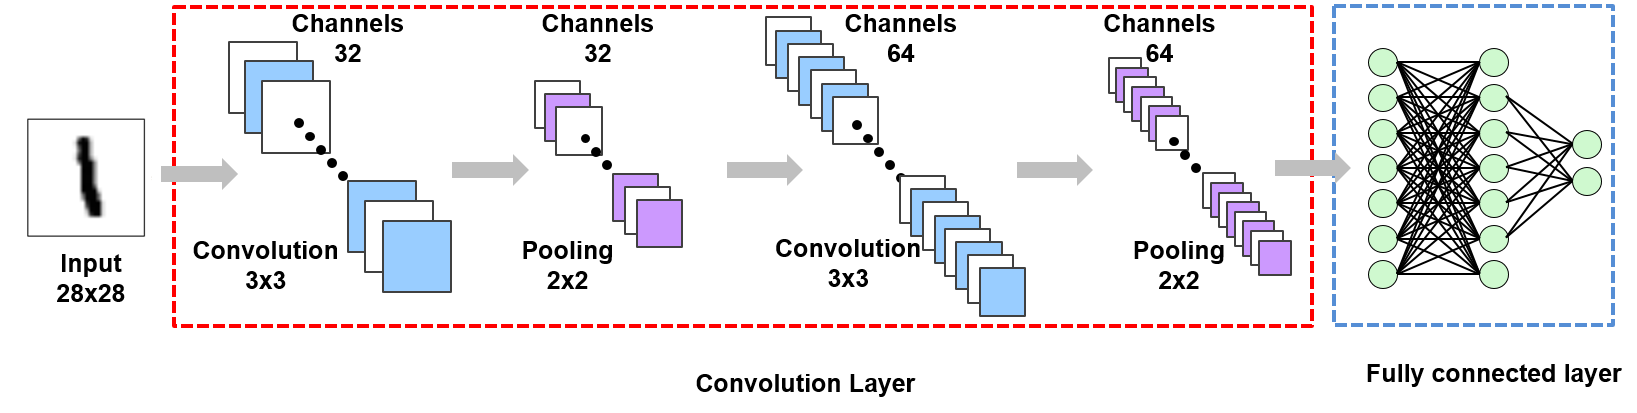</center>
<br>

## 1-1. Training

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [5]:
# input layer
input_h = 28   # input height
input_w = 28   # input width
input_ch = 1    # input channel : Gray scale

# 1st convolution layer
k1_h = 3
k1_w = 3
k1_ch = 32
p1_h = 2
p1_w = 2
# (None, 14, 14, 32)

# 2nd convolution layer
k2_h = 3
k2_w = 3
k2_ch = 64
p2_h = 2
p2_w = 2
# (None, 7, 7, 64)

# Fully connected : flatten the features (7x7x64)
conv_result_size = 7*7*64
n_hidden = 100
n_output = 10

In [6]:
# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'conv1' : tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_hidden, n_output], stddev = 0.1))
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_ch], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([n_hidden], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([n_output], stddev = 0.1))
}

# input layer : [batch_size, image_height, image_width, channels]
# output layer : [batch_size, class_size]
x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)


Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
# [batch, height, width, channels]

def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(tf.nn.bias_add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1,p1_h,p1_w,1], strides=[1,p1_h,p1_w,1], padding='SAME')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(tf.nn.bias_add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1,p2_h,p2_w,1], strides=[1,p2_h,p2_w,1], padding='SAME')

    maxp2_flatten = tf.reshape(maxp2, [-1, conv_result_size])

    # Fully connected
    hidden = tf.nn.relu(tf.matmul(maxp2_flatten, weights['hidden']) + biases['hidden'])
    output = tf.matmul(hidden, weights['output']) + biases['output']

    return output

In [8]:
# Loss function

LR = 0.0001
pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels= y)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Iter : 0
Train Loss : 2.4293484687805176
Cost : 2.471997022628784
Iter : 250
Train Loss : 0.464741051197052
Cost : 0.5430654287338257
Iter : 500
Train Loss : 0.24876493215560913
Cost : 0.3268827199935913
Iter : 750
Train Loss : 0.2692726254463196
Cost : 0.16485625505447388
Iter : 1000
Train Loss : 0.20840850472450256
Cost : 0.12292282283306122
Iter : 1250
Train Loss : 0.3006146550178528
Cost : 0.17415815591812134
Iter : 1500
Train Loss : 0.1526481807231903
Cost : 0.408273845911026
Iter : 1750
Train Loss : 0.10662171244621277
Cost : 0.22392088174819946
Iter : 2000
Train Loss : 0.04998041316866875
Cost : 0.16962063312530518
Iter : 2250
Train Loss : 0.08178296685218811
Cost : 0.13443143665790558


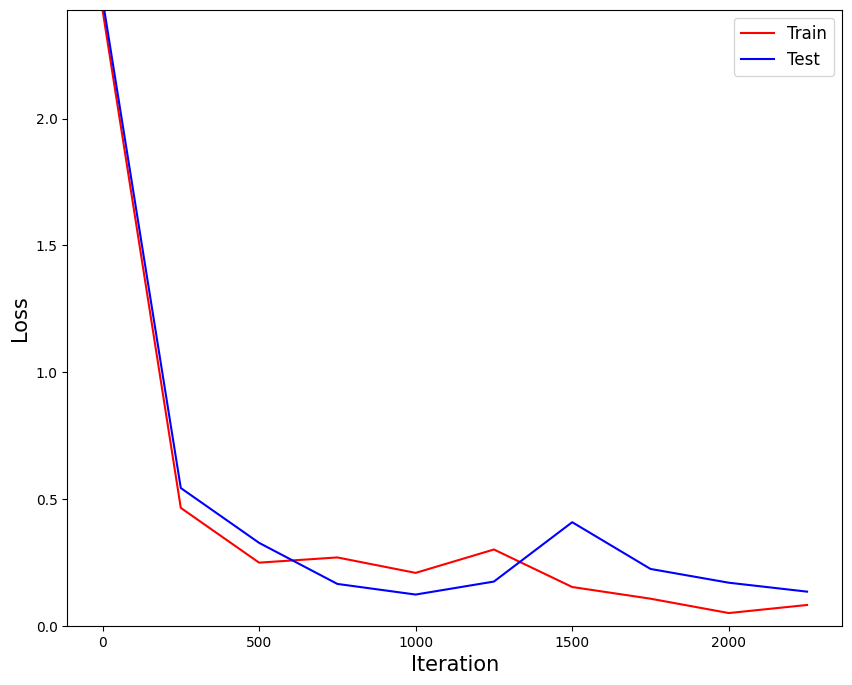

In [9]:
# Optimization

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    # train_x, train_y = mnist.train.next_batch(n_batch)
    # train_x = np.reshape(train_x, (-1, 28, 28, 1))
    # # train_x = np.reshape(train_x, (n_batch, input_h, input_w, input_ch))
    # sess.run(optm, feed_dict={x:train_x, y:train_y})

    # Get a random batch of training data
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]

    batch_x = np.reshape(batch_x, (-1, 28, 28, 1))
    # batch_x = np.reshape(batch_x, (n_batch, input_h, input_w, input_ch))
    batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=10)

    sess.run(optm, feed_dict={x:batch_x, y:batch_y})

    if epoch % n_prt == 0:
        # test_x, test_y = mnist.test.next_batch(n_batch)
        # test_x = test_x.reshape((n_batch, input_h, input_w, input_ch))
        # c1 = sess.run(loss, feed_dict={x:train_x, y:train_y})
        # c2 = sess.run(loss, feed_dict={x:test_x, y:test_y})

        # Get a random batch of test data
        test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_batch_indices]
        test_batch_y = test_y[test_batch_indices]

        test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
        test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)
        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

## 1-2. Testing or Evaluating

In [10]:
# Evaluation
# Get a random batch of test data
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 98.0


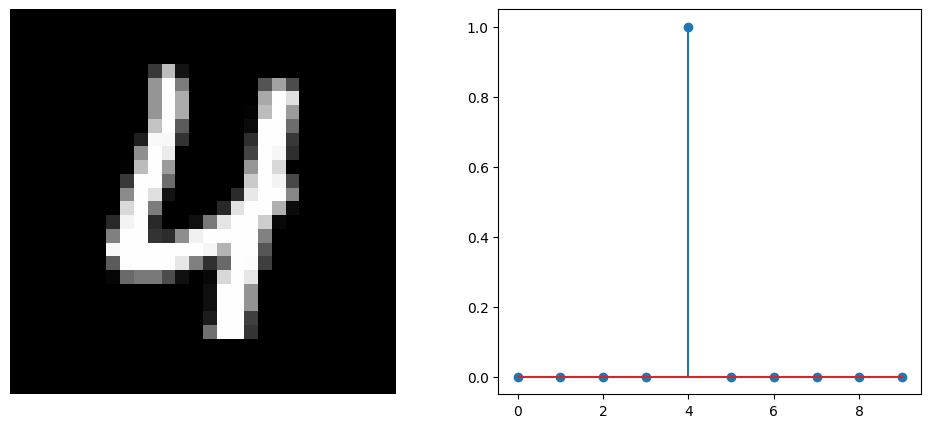

Prediction : 4
Probability : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
# Get a random batch of test data
n_batch = 1
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)

logits = sess.run(tf.nn.softmax(pred), feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(test_batch_x.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision = 2, suppress = True)
print('Prediction : {}'.format(predict))
print('Probability : {}'.format(logits.ravel()))

## 1-3. Debugging

Iter : 0
Train Loss : 2.3587827682495117
Cost : 2.3035361766815186
Iter : 250
Train Loss : 0.7037451863288879
Cost : 0.5091021656990051
Iter : 500
Train Loss : 0.20669019222259521
Cost : 0.5393261909484863
Iter : 750
Train Loss : 0.4001646339893341
Cost : 0.2488122135400772
Iter : 1000
Train Loss : 0.15440087020397186
Cost : 0.09288106858730316
Iter : 1250
Train Loss : 0.06226396560668945
Cost : 0.15905900299549103
Iter : 1500
Train Loss : 0.07130211591720581
Cost : 0.2517009675502777
Iter : 1750
Train Loss : 0.27857646346092224
Cost : 0.11721515655517578
Iter : 2000
Train Loss : 0.08471053093671799
Cost : 0.15198993682861328
Iter : 2250
Train Loss : 0.058294907212257385
Cost : 0.11635836958885193


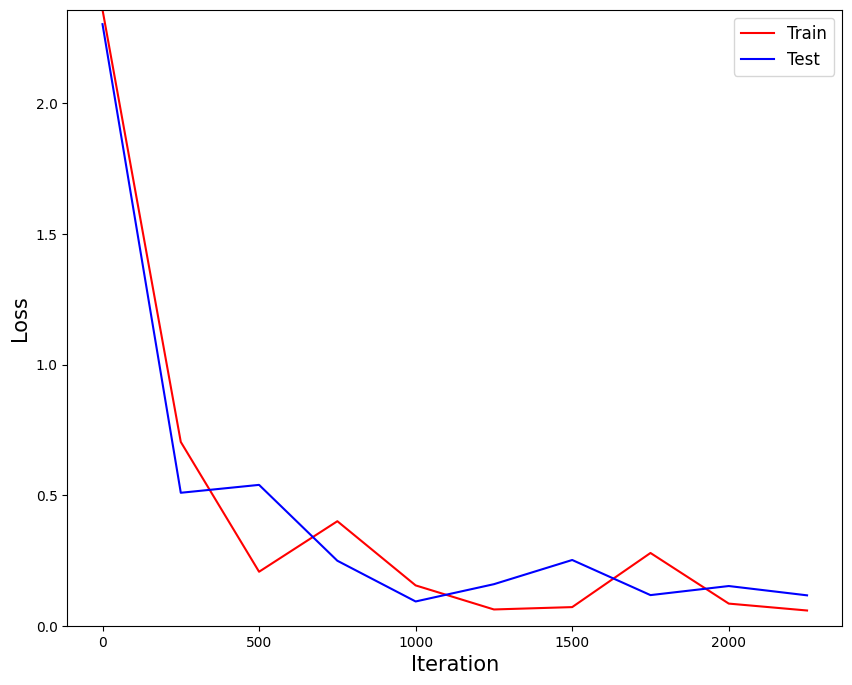

In [12]:
# Optimization
n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

n_train_samples = train_x.shape[0]

for epoch in range(n_iter):
    batch_start_index = (epoch * n_batch) % n_train_samples
    batch_end_index = batch_start_index + n_batch

    if batch_end_index > n_train_samples:
        train_batch_x = np.concatenate((train_x[batch_start_index:], train_x[:batch_end_index - n_train_samples]), axis=0)
        train_batch_y = np.concatenate((train_y[batch_start_index:], train_y[:batch_end_index - n_train_samples]), axis=0)
    else:
        train_batch_x = train_x[batch_start_index:batch_end_index]
        train_batch_y = train_y[batch_start_index:batch_end_index]

    train_batch_y_one_hot = tf.keras.utils.to_categorical(train_batch_y, num_classes=10)
    sess.run(optm, feed_dict={x:train_batch_x, y:train_batch_y_one_hot})

    if epoch % n_prt == 0:
        test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x_eval = test_x[test_batch_indices]
        test_batch_y_eval = test_y[test_batch_indices]
        test_batch_y_eval_one_hot = tf.keras.utils.to_categorical(test_batch_y_eval, num_classes=10)

        c1 = sess.run(loss, feed_dict={x:train_batch_x, y:train_batch_y_one_hot})
        c2 = sess.run(loss, feed_dict={x:test_batch_x_eval, y:test_batch_y_eval_one_hot})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

#  2. 위의 문제에서 Convolution Layer(conv3), Fully connected layer(FC2) 를 1개씩 추가하고, 정확도가 높아지는지 평가하라.

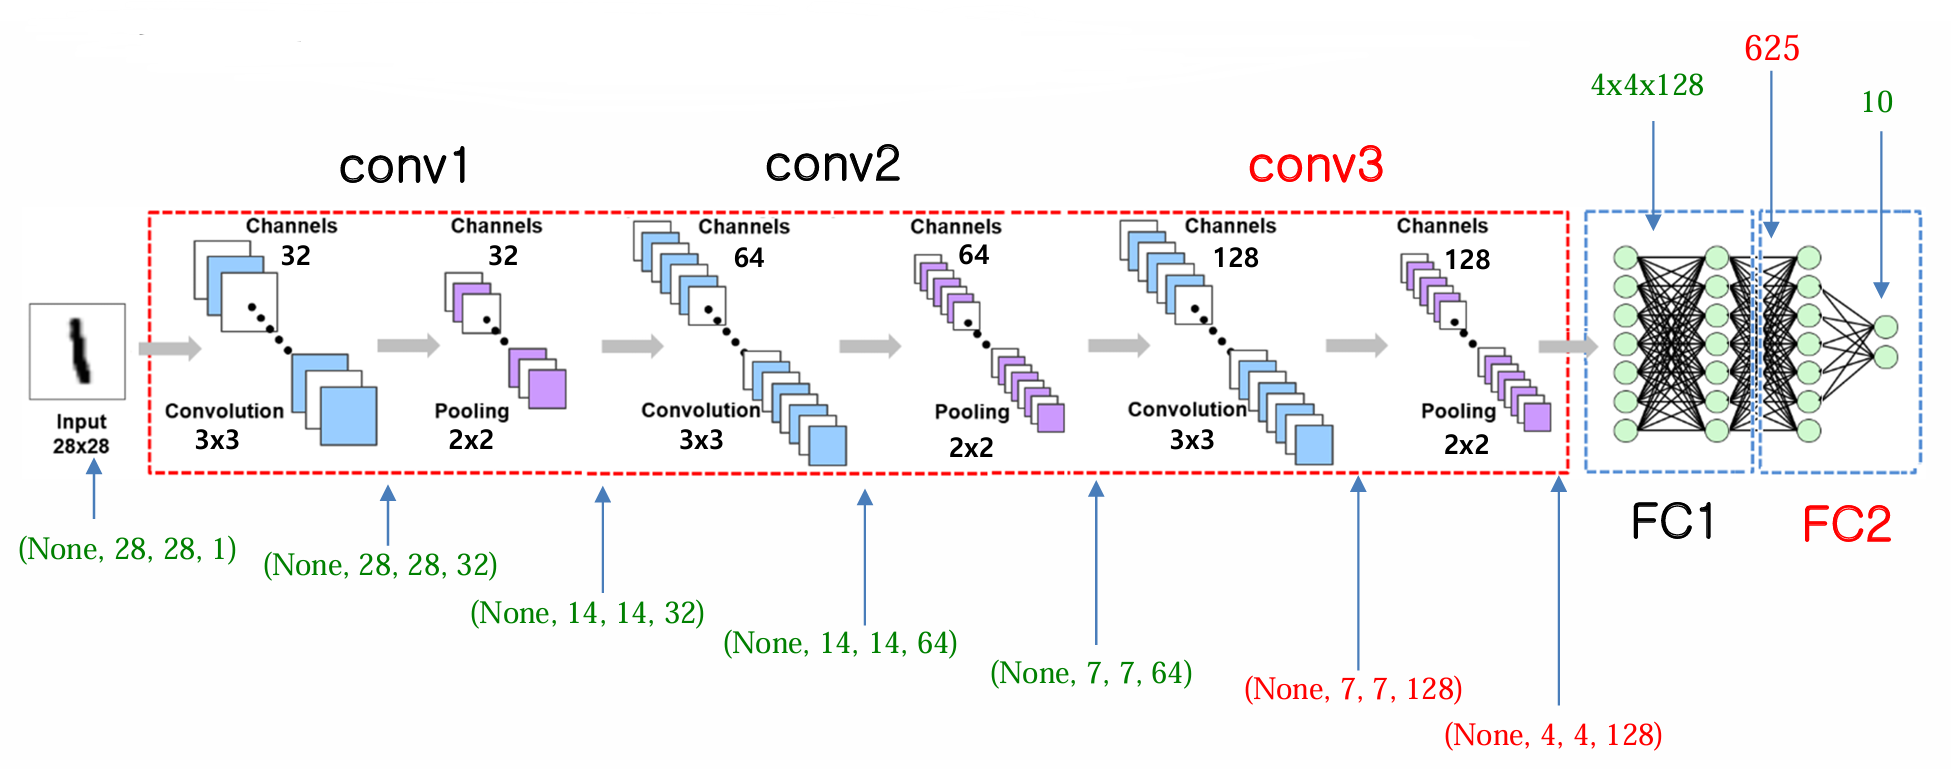

## 2-1. Training

In [13]:
# 3rd convolution layer
k3_h = 3
k3_w = 3
k3_ch = 128
p3_h = 2
p3_w = 2
# (None, 4, 4, 128)

conv_result_size = 4*4*k3_ch

# Fully connected layers
n_hidden1 = 100
n_hidden2 = 50
n_output = 10

# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
# Fully connected weight size : [input_size, output_size]
weights = {
    'conv1' : tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev = 0.1)),
    'conv3' : tf.Variable(tf.random.normal([k3_h, k3_w, k2_ch, k3_ch], stddev = 0.1)), # New conv layer
    'hidden1' : tf.Variable(tf.random.normal([conv_result_size, n_hidden1], stddev = 0.1)), # First FC layer
    'hidden2' : tf.Variable(tf.random.normal([n_hidden1, n_hidden2], stddev = 0.1)), # New second FC layer
    'output' : tf.Variable(tf.random.normal([n_hidden2, n_output], stddev = 0.1)) # Output layer connecting from n_hidden2
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_ch], stddev = 0.1)),
    'conv3' : tf.Variable(tf.random.normal([k3_ch], stddev = 0.1)), # New conv layer
    'hidden1' : tf.Variable(tf.random.normal([n_hidden1], stddev = 0.1)), # First FC layer
    'hidden2' : tf.Variable(tf.random.normal([n_hidden2], stddev = 0.1)), # New second FC layer
    'output' : tf.Variable(tf.random.normal([n_output], stddev = 0.1)) # Output layer connecting from n_hidden2
}

In [14]:
def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(tf.nn.bias_add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1,p1_h,p1_w,1], strides=[1,p1_h,p1_w,1], padding='SAME')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(tf.nn.bias_add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1,p2_h,p2_w,1], strides=[1,p2_h,p2_w,1], padding='SAME')

    # 3rd convolution layer
    conv3 = tf.nn.conv2d(maxp2, weights['conv3'], strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(tf.nn.bias_add(conv3, biases['conv3']))
    maxp3 = tf.nn.max_pool(conv3, ksize=[1,p3_h,p3_w,1], strides=[1,p3_h,p3_w,1], padding='SAME')

    # Flatten the features for the fully connected layers
    maxp3_flatten = tf.reshape(maxp3, [-1, conv_result_size])

    # Fully connected layer 1 (hidden1)
    hidden1 = tf.nn.relu(tf.matmul(maxp3_flatten, weights['hidden1']) + biases['hidden1'])

    # Fully connected layer 2 (hidden2)
    hidden2 = tf.nn.relu(tf.matmul(hidden1, weights['hidden2']) + biases['hidden2'])

    # Output layer
    output = tf.matmul(hidden2, weights['output']) + biases['output']

    return output

In [15]:
# Loss function
LR = 0.0001
pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels= y)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

Iter : 0
Train Loss : 2.2989931106567383
Cost : 2.374321937561035
Iter : 250
Train Loss : 0.5553908944129944
Cost : 0.8556577563285828
Iter : 500
Train Loss : 0.1482498049736023
Cost : 0.23118899762630463
Iter : 750
Train Loss : 0.3961416482925415
Cost : 0.18820558488368988
Iter : 1000
Train Loss : 0.08444848656654358
Cost : 0.1324785351753235
Iter : 1250
Train Loss : 0.04395550861954689
Cost : 0.08341199159622192
Iter : 1500
Train Loss : 0.08840952813625336
Cost : 0.10037095844745636
Iter : 1750
Train Loss : 0.19001451134681702
Cost : 0.07789360731840134
Iter : 2000
Train Loss : 0.0786956325173378
Cost : 0.03764914348721504
Iter : 2250
Train Loss : 0.02518308162689209
Cost : 0.08125566691160202


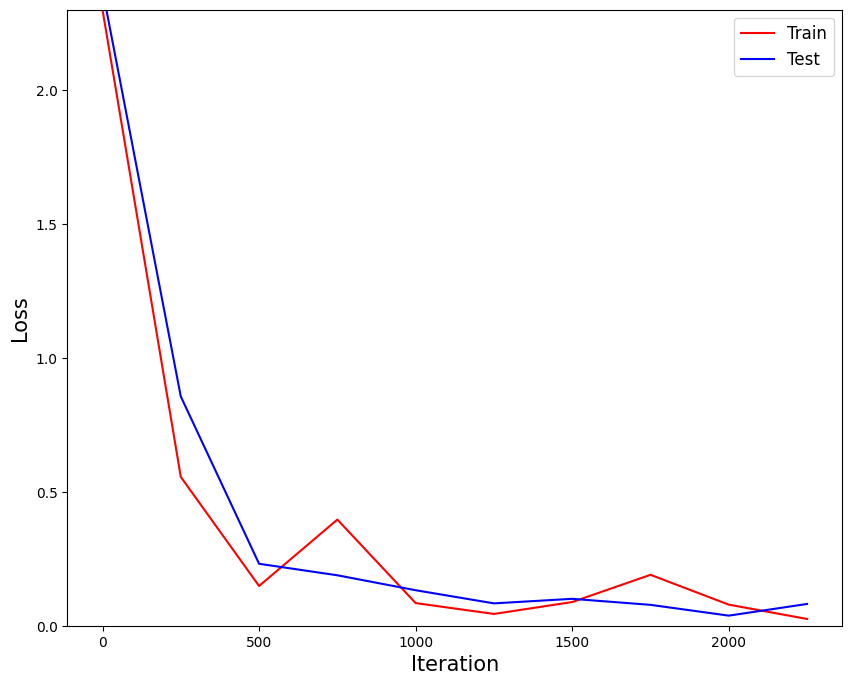

In [16]:
# Optimization
n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

n_train_samples = train_x.shape[0]

for epoch in range(n_iter):
    batch_start_index = (epoch * n_batch) % n_train_samples
    batch_end_index = batch_start_index + n_batch

    if batch_end_index > n_train_samples:
        train_batch_x = np.concatenate((train_x[batch_start_index:], train_x[:batch_end_index - n_train_samples]), axis=0)
        train_batch_y = np.concatenate((train_y[batch_start_index:], train_y[:batch_end_index - n_train_samples]), axis=0)
    else:
        train_batch_x = train_x[batch_start_index:batch_end_index]
        train_batch_y = train_y[batch_start_index:batch_end_index]

    train_batch_y_one_hot = tf.keras.utils.to_categorical(train_batch_y, num_classes=10)
    sess.run(optm, feed_dict={x:train_batch_x, y:train_batch_y_one_hot})

    if epoch % n_prt == 0:
        test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x_eval = test_x[test_batch_indices]
        test_batch_y_eval = test_y[test_batch_indices]
        test_batch_y_eval_one_hot = tf.keras.utils.to_categorical(test_batch_y_eval, num_classes=10)

        c1 = sess.run(loss, feed_dict={x:train_batch_x, y:train_batch_y_one_hot})
        c2 = sess.run(loss, feed_dict={x:test_batch_x_eval, y:test_batch_y_eval_one_hot})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

## 2-2. Testing or Evaluating

In [17]:
# Evaluation
# Get a random batch of test data
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 96.0


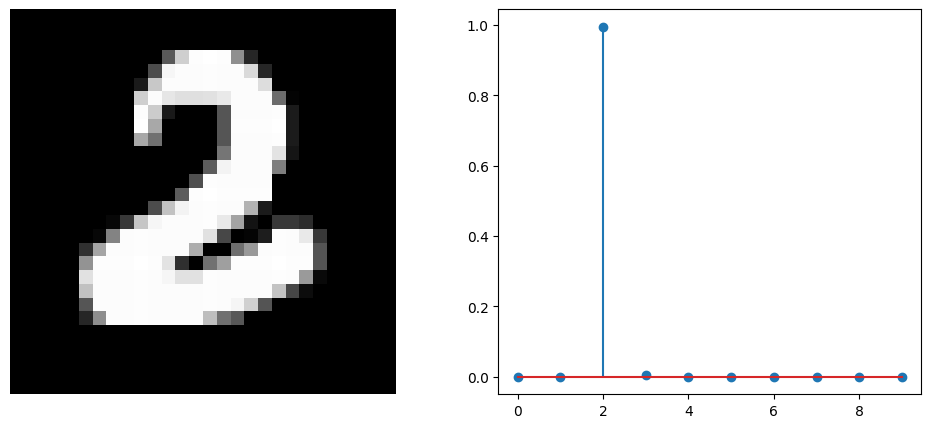

Prediction : 2
Probability : [0.   0.   0.99 0.01 0.   0.   0.   0.   0.   0.  ]


In [18]:
# Get a random batch of test data for visualization
n_batch = 1
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)

logits = sess.run(tf.nn.softmax(pred), feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(test_batch_x.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision = 2, suppress = True)
print('Prediction : {}'.format(predict))
print('Probability : {}'.format(logits.ravel()))

## 3-3. Debugging

Iter : 0
Train Loss : 2.379652261734009
Cost : 2.493744134902954
Iter : 250
Train Loss : 0.5341805815696716
Cost : 0.5785422325134277
Iter : 500
Train Loss : 0.128361776471138
Cost : 0.27176350355148315
Iter : 750
Train Loss : 0.34435027837753296
Cost : 0.3191804885864258
Iter : 1000
Train Loss : 0.10019724816083908
Cost : 0.12585462629795074
Iter : 1250
Train Loss : 0.02958374284207821
Cost : 0.1706821471452713
Iter : 1500
Train Loss : 0.04767236113548279
Cost : 0.06885308772325516
Iter : 1750
Train Loss : 0.2433648705482483
Cost : 0.1109141856431961
Iter : 2000
Train Loss : 0.096286840736866
Cost : 0.08644597232341766
Iter : 2250
Train Loss : 0.025069473311305046
Cost : 0.1551441252231598


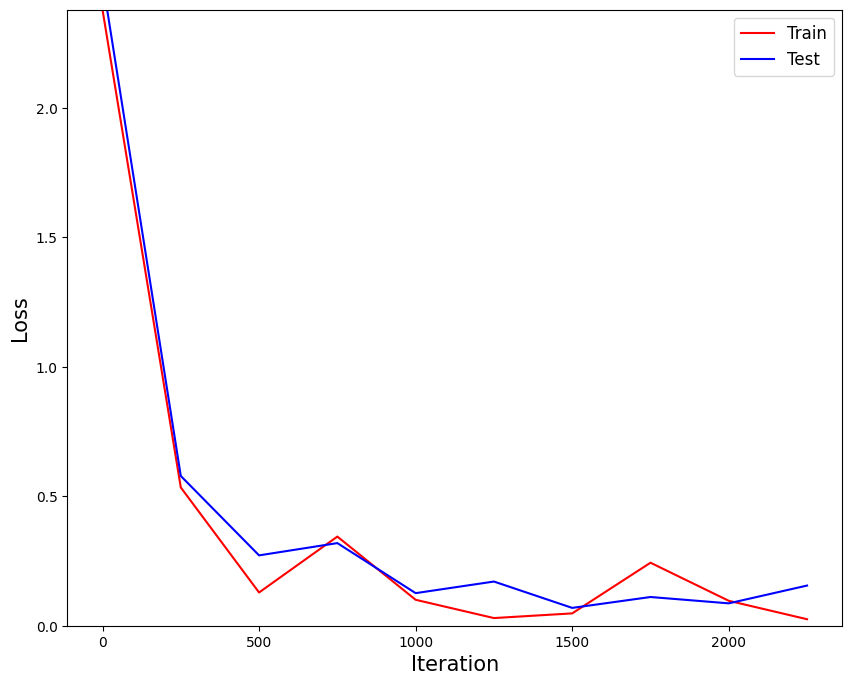

Accuracy after debugging run: 96.0


In [19]:
# Optimization
n_batch = 50
n_iter = 2500
n_prt = 250

# Reset session and re-initialize variables for the debugging run
sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

n_train_samples = train_x.shape[0]

for epoch in range(n_iter):
    batch_start_index = (epoch * n_batch) % n_train_samples
    batch_end_index = batch_start_index + n_batch

    if batch_end_index > n_train_samples:
        train_batch_x = np.concatenate((train_x[batch_start_index:], train_x[:batch_end_index - n_train_samples]), axis=0)
        train_batch_y = np.concatenate((train_y[batch_start_index:], train_y[:batch_end_index - n_train_samples]), axis=0)
    else:
        train_batch_x = train_x[batch_start_index:batch_end_index]
        train_batch_y = train_y[batch_start_index:batch_end_index]

    train_batch_y_one_hot = tf.keras.utils.to_categorical(train_batch_y, num_classes=10)
    sess.run(optm, feed_dict={x:train_batch_x, y:train_batch_y_one_hot})

    if epoch % n_prt == 0:
        test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x_eval = test_x[test_batch_indices]
        test_batch_y_eval = test_y[test_batch_indices]
        test_batch_y_eval_one_hot = tf.keras.utils.to_categorical(test_batch_y_eval, num_classes=10)

        c1 = sess.run(loss, feed_dict={x:train_batch_x, y:train_batch_y_one_hot})
        c2 = sess.run(loss, feed_dict={x:test_batch_x_eval, y:test_batch_y_eval_one_hot})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

# Evaluate again after the "debugging" re-training
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy after debugging run: {}".format(accr*100))

# 3. 평가

코딩 결과, 실습 예제의 정확도(accuracy)는 98이었다.
그러나 conv3와 FC2를 추가한 모델의 학습 결과, 정확도는 96으로 오히려 2%p 감소한 모습을 볼 수 있다.

컨벌루션 연산을 3차까지 한 차례 더 진행하며 파라미터 수가 급격하게 늘어났기 때문에 과적합, 즉 overfitting 현상이 발생했다고 볼 수 있다.

이는 추가 레이어가 무조건적인 성능 향상을 보장하지 않는다는 점을 잘 보여준다.